# The gadAXW Operon: Demonstrating the Bitome

## Setup

### Import Required Modules

In [1]:
# built-in modules
from pathlib import Path
import sys

# third-party modules
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

BITOME_KB_PATH = Path('..', 'bitome-kb')
sys.path.append(BITOME_KB_PATH.absolute().as_posix())
from bitome.core import Bitome

### Set Global Variables

In [7]:
FIG_PATH = Path('..', 'figures', 'figure_1')
LOCAL_CACHE_PATH = Path('..', 'local_cache')

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

### Load Bitome KB and gadAWX Information

In [6]:
test_bitome = Bitome.init_from_file(Path(LOCAL_CACHE_PATH, 'bitome.pkl'))
gadaxw = [op for op in test_bitome.operons if op.name == 'gadAXW'][0]
start_pos = gadaxw.location.start.position
end_pos = gadaxw.location.end.position
sub_mat = test_bitome.extract(column_range=(start_pos, end_pos))

## Figures

### Matrix Image

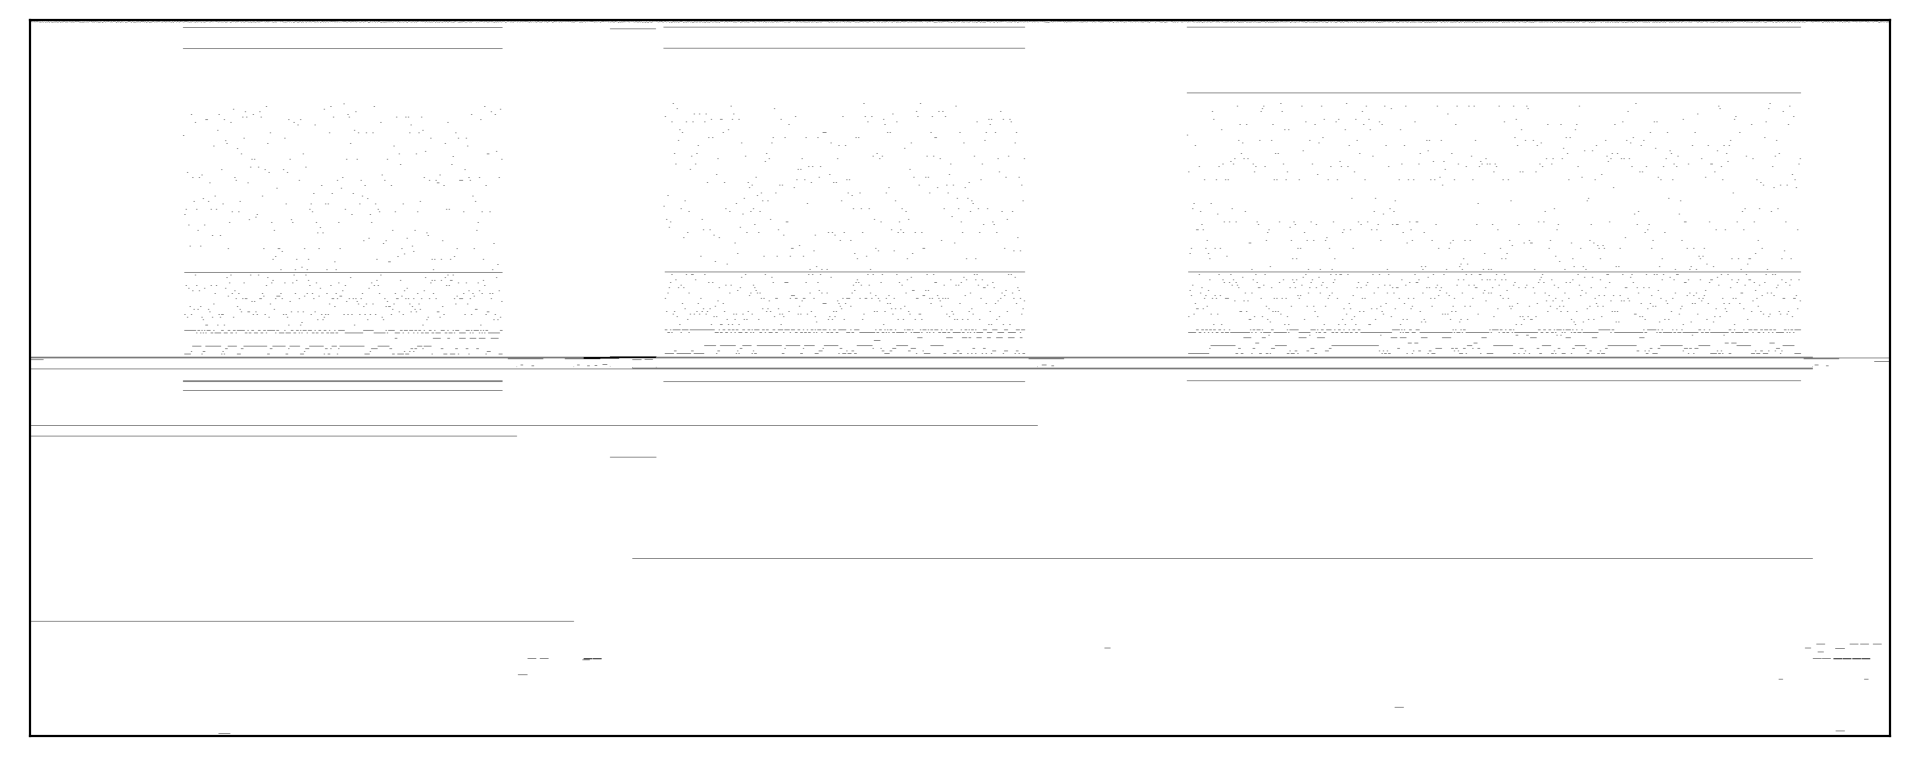

In [8]:
_, _ = plt.subplots(figsize=(12, 5), dpi=200)
plt.imshow(sub_mat.todense(), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(Path(FIG_PATH, 'matrix_img.svg'))
plt.show()

### Close-Up Matrix Image

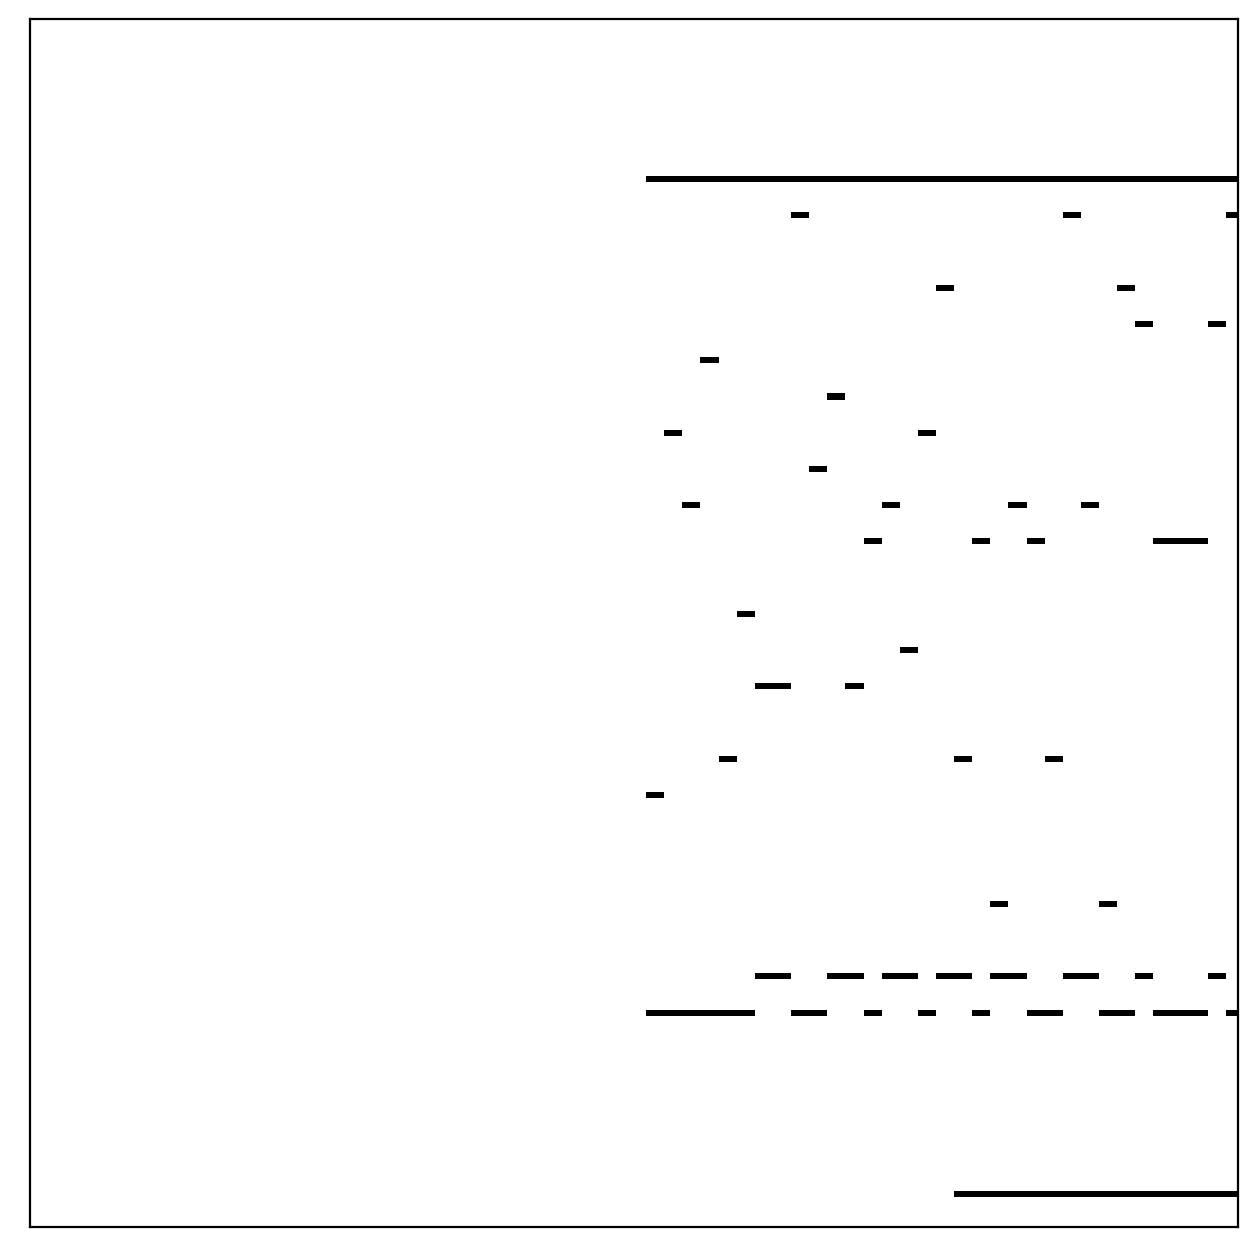

In [9]:
_, _ = plt.subplots(figsize=(8, 8), dpi=200)
plt.imshow(sub_mat.todense()[550:750, 2540:2740], cmap='binary')
plt.xticks([])
plt.yticks([])
plt.savefig(Path(FIG_PATH, 'matrix_img_dense.svg'))
plt.show()

### Colorbar and Legend

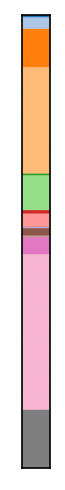

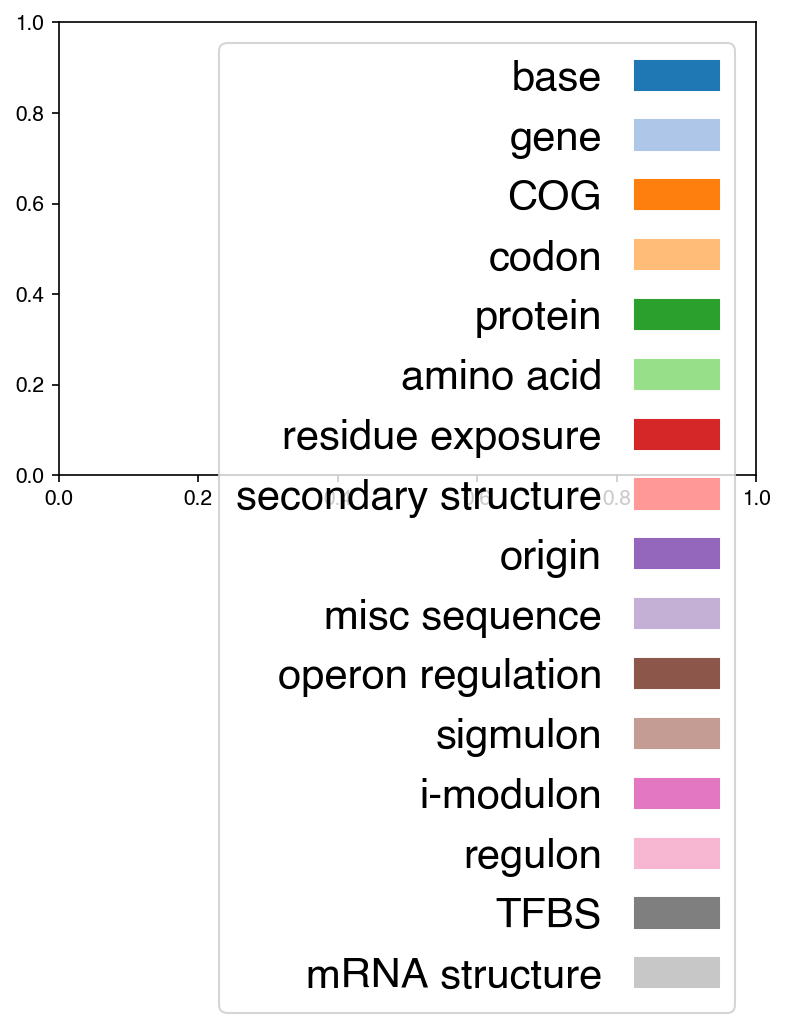

In [10]:
row_labels_base = []
for row_label in test_bitome.matrix_row_labels:
    split_label = row_label.split('_')
    base_label = split_label[0]
    if base_label in ['amino', 'secondary', 'residue', 'mobile', 'repeat', '-10', '-35', 'mRNA']:
        base_label = base_label + '_' + split_label[1]
    # do some custom collapsing for clearer labeling
    if base_label in [
        'TU', 'operon', 'promoter', 'terminator', 'attenuator', 'Shine-Dalgarno', '-35_box', '-10_box', 'riboswitch',
        'TTS', 'TSS'
    ]:
        base_label = 'operon_regulation'
    elif base_label in ['repeat_region', 'ori', 'mobile_element']:
        base_label = 'misc_sequence'
    row_labels_base.append(base_label)

# make color to label lookup
ordered_unique_labels = []
for label in row_labels_base:
    if not ordered_unique_labels:
        ordered_unique_labels.append(label)
    elif ordered_unique_labels and ordered_unique_labels[-1] != label:
        ordered_unique_labels.append(label)
color_lookup = {label: color for label, color in zip(ordered_unique_labels, plt.cm.tab20.colors)}

colorbar_arr = np.zeros((test_bitome.matrix.shape[0], 1, 3))
for i, lab in enumerate(row_labels_base):
    colorbar_arr[i, :, :3] = color_lookup[lab]
_, _ = plt.subplots()
plt.imshow(colorbar_arr, aspect=0.01)
plt.xticks([])
plt.yticks([])
plt.savefig(Path(FIG_PATH, 'row_bar.svg'))
plt.show()

_, _ = plt.subplots()
legend_elems = [Patch(facecolor=col, edgecolor=col, label=lab.replace('_', ' ')) for lab, col in color_lookup.items()]
plt.legend(handles=legend_elems, prop={'size': 20}, markerfirst=False)
plt.savefig(Path(FIG_PATH, 'row_colors_legend.svg'))
plt.show()

### Row and Columns Sums

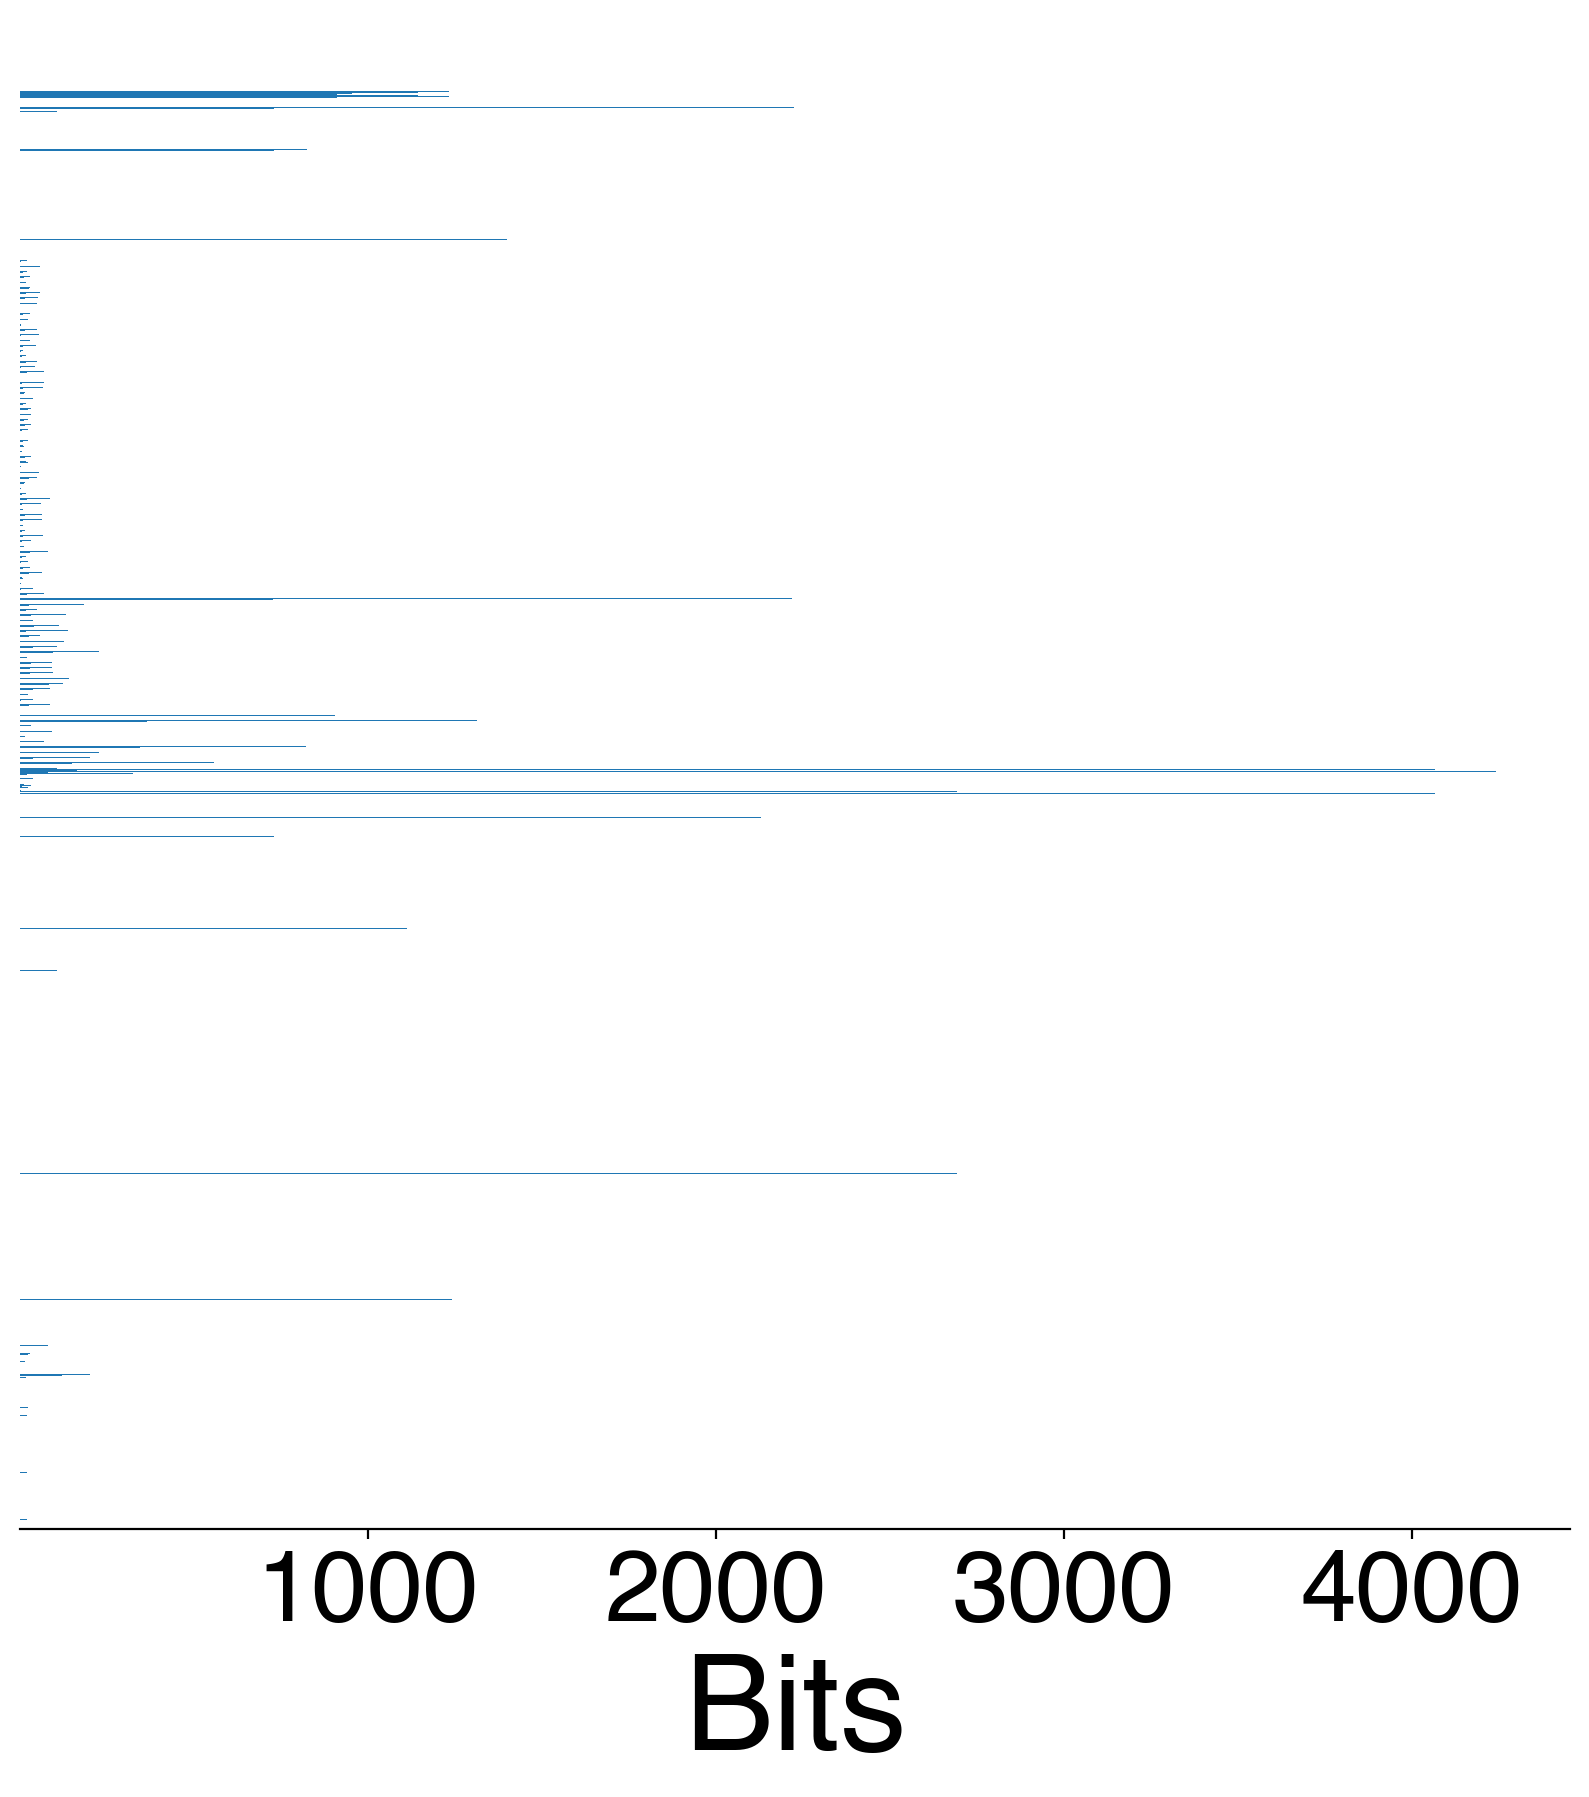

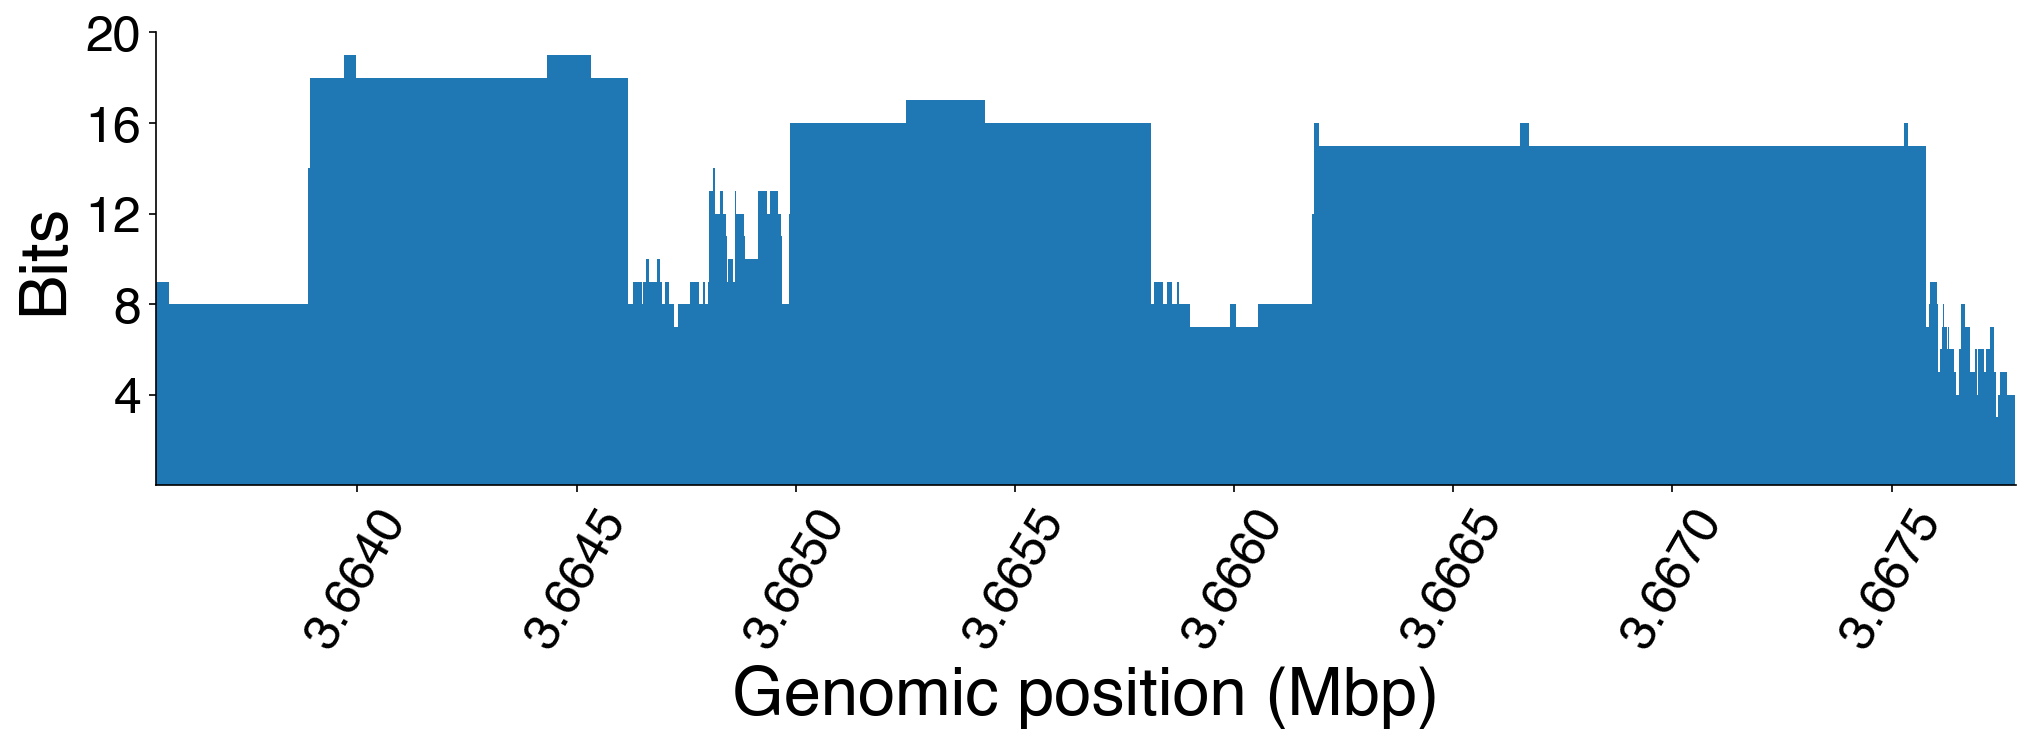

In [11]:
# --- Column and Row Sums ---
column_sums = np.asarray(sub_mat.sum(axis=0)).flatten()
row_sums = np.asarray(sub_mat.sum(axis=1)).flatten()
total_bits = sub_mat.sum()
sparsity = 1 - total_bits/(sub_mat.shape[0]*sub_mat.shape[1])

# row sums
_, ax = plt.subplots(figsize=(10, 10), dpi=200)
y = np.arange(0, sub_mat.shape[0])[::-1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.barh(y, row_sums, height=1)
ax.tick_params(axis='x', labelsize='36')
plt.xticks([1000, 2000, 3000, 4000])
plt.yticks([])
plt.ylim(bottom=0)
plt.xlabel('Bits', fontsize=48)
plt.savefig(Path(FIG_PATH, 'row_sums.svg'))
plt.show()

# columns sums
fig, ax = plt.subplots(figsize=(16, 4))
x = np.arange(start_pos, end_pos)/1000000
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(x, column_sums, width=0.000001)
ax.tick_params(axis='x', labelsize='24', rotation=60)
ax.tick_params(axis='y', labelsize='24')
plt.xlabel('Genomic position (Mbp)', fontsize=32)
plt.ylabel('Bits', fontsize=32)
plt.yticks([4, 8, 12, 16, 20])
plt.xlim(left=start_pos/1000000, right=end_pos/1000000)
plt.savefig(Path(FIG_PATH, 'column_sums.svg'))
plt.show()